# 0. Set up

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

# 1. Preprocessing

## 1.1 Normalise the data and use one hot encoding

In [6]:
#Normalize the RGB to between 0 and 1
X_train_scaled = X_train/255
X_test_scaled = X_test/255

#changes the category to one hot encoding
#[1] -> [1,0,0,0,0,0,0,0,0,0,0]
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [7]:
print(y_test.shape)
print(y_test_categorical.shape)

(10000, 1)
(10000, 10)


# 2. Model

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000, activation='relu'), #32*32*3 = 3072, so 3000 just a random smaller number
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='softmax') #outputs a probability for each class
])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/5
1563/1563 [==============================] - 74s 47ms/step - loss: 1.8118 - accuracy: 0.3514
Epoch 2/5
1563/1563 [==============================] - 69s 44ms/step - loss: 1.6221 - accuracy: 0.4275
Epoch 3/5
1563/1563 [==============================] - 68s 44ms/step - loss: 1.5430 - accuracy: 0.4563
Epoch 4/5
1563/1563 [==============================] - 68s 44ms/step - loss: 1.4822 - accuracy: 0.4762
Epoch 5/5
1563/1563 [==============================] - 67s 43ms/step - loss: 1.4337 - accuracy: 0.4968


In [13]:
history = model.fit(X_train_scaled, y_train_categorical, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.3889 - accuracy: 0.5130
Epoch 2/5
1563/1563 [==============================] - 65s 41ms/step - loss: 1.3535 - accuracy: 0.5242
Epoch 3/5
1563/1563 [==============================] - 66s 42ms/step - loss: 1.3186 - accuracy: 0.5360
Epoch 4/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.2868 - accuracy: 0.5499
Epoch 5/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.2570 - accuracy: 0.5583


In [15]:
# Assuming you have already trained your model and stored it in the variable 'model'

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_scaled, y_test_categorical)

# Print the test loss and accuracy
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 4s 12ms/step - loss: 1.4874 - accuracy: 0.4751
Test Loss: 1.487366795539856
Test Accuracy: 0.47510001063346863


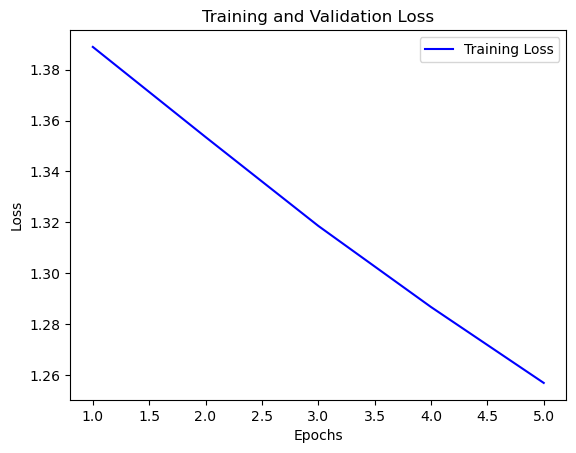

In [16]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and stored the training history in the variable 'history'

# Get the training and validation loss from the history
train_loss = history.history['loss']

# Plot the training and validation loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()